### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/datacamp/climate_change.csv",index_col='date',
               parse_dates=['date'])
df.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [3]:
df.shape

(706, 2)

In [4]:
df.dtypes

co2              float64
relative_temp    float64
dtype: object

In [5]:
df.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [6]:
df.isnull().sum()

co2              7
relative_temp    0
dtype: int64

### Plotting time-series data

Text(0, 0.5, '$CO_2$ (ppm)')

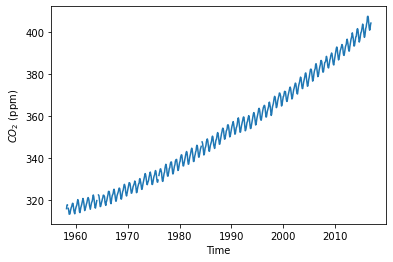

In [7]:
fig, ax=plt.subplots()
ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('$CO_2$ (ppm)')

### Zooming in on a decade

In [8]:
sixties=df.loc["1960-01-01":"1969-12-31"]

Text(0, 0.5, '$CO_2$ (ppm)')

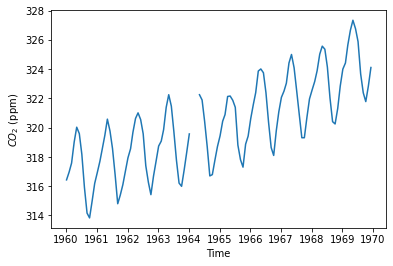

In [9]:
fig, ax=plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('$CO_2$ (ppm)')
#The graph show some breaking point which is occured for NaN entry

### Zooming in on one year

Text(0, 0.5, '$CO2 $(ppm)')

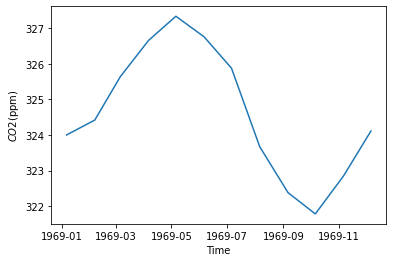

In [10]:
sixty_nine = df["1969-01-01":"1969-12-31"]
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('$CO2 $(ppm)')

## Plotting time-series with different variables
### Plotting two time-series together

Text(0, 0.5, '$CO2 $(ppm) / Relative temperature')

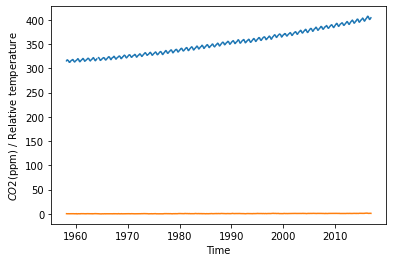

In [11]:
fig, ax = plt.subplots()
ax.plot(df.index, df["co2"])
ax.plot(df.index, df["relative_temp"])
ax.set_xlabel('Time')
ax.set_ylabel('$CO2 $(ppm) / Relative temperature')

### Using twin axes

Text(0, 0.5, 'Relative temperature (Celsius)')

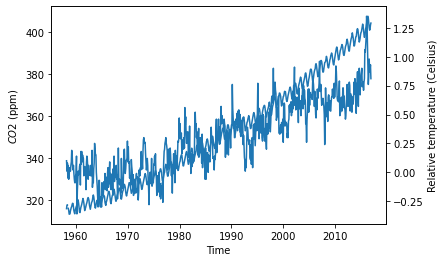

In [12]:
fig, ax = plt.subplots()
ax.plot(df.index, df["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('$CO2$ (ppm)')
ax2 = ax.twinx()
ax2.plot(df.index, df["relative_temp"])
ax2.set_ylabel('Relative temperature (Celsius)')

### Separating variables by color

Text(0, 0.5, 'Relative temperature (Celsius)')

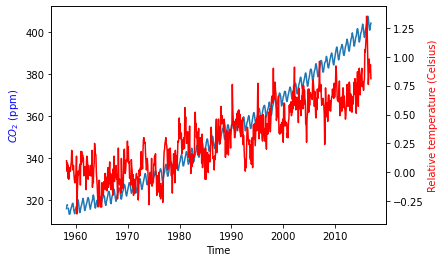

In [13]:
fig, ax = plt.subplots()
ax.plot(df.index, df["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('$CO_2$ (ppm)', color='b')
ax2 = ax.twinx()
ax2.plot(df.index, df["relative_temp"], color='r')
ax2.set_ylabel('Relative temperature (Celsius)', color='r')

### Coloring the ticks

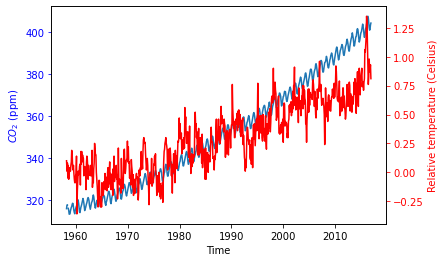

In [14]:
fig, ax = plt.subplots()
ax.plot(df.index, df["co2"])
ax.set_xlabel('Time')
ax.set_ylabel('$CO_2$ (ppm)', color='b')
ax.tick_params(axis='y', colors='b')

ax2 = ax.twinx()
ax2.plot(df.index, df["relative_temp"], color='r')
ax2.set_ylabel('Relative temperature (Celsius)', color='r')
ax2.tick_params(axis='y', colors='r')

### A function that plots time-series

In [15]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

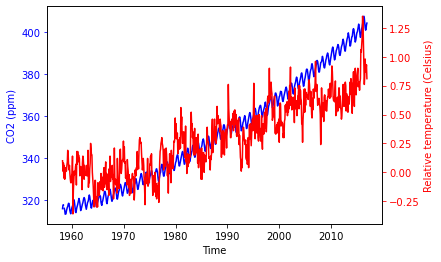

In [16]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['co2'],'blue', 'Time', 'CO2 (ppm)')

ax2 = ax.twinx()

plot_timeseries(ax2, df.index, df['relative_temp'],'red', 
                'Time', 'Relative temperature (Celsius)')

## Annotating time-series data
### [Annotation](https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)

Text(2015-10-06 00:00:00, 1, '>1 degree')

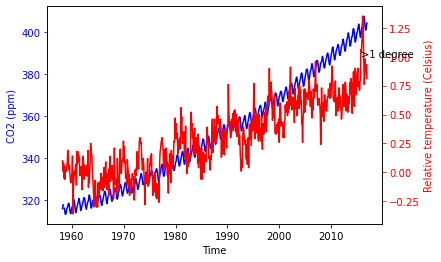

In [17]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['co2'],'blue', 'Time', 'CO2 (ppm)')

ax2 = ax.twinx()

plot_timeseries(ax2, df.index, df['relative_temp'],'red', 
                'Time', 'Relative temperature (Celsius)')

ax2.annotate(">1 degree", xy=[pd.to_datetime("2015-10-06"), 1])